# Lab 2: Gaussian Elimination
Kabilan Sriranjan

02/03/18

In [1]:
import math
import time
import random as rn
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

## Question 2.

Create an nxn numpy array with random entries taken uniformly from [-1,1]

In [2]:
def randomMatrix(n):
    M = []
    for i in range(0, n):
        r = []
        for j in range(0, n):
            r.append(rn.uniform(-1,1))
        M.append(r)
    return np.matrix(M)

## Question 3.
AN implementation of Gaussian Elimination with partial pivoting. There are two subroutines, one to move the best row to pivot to the top and another to eliminate a single column.

In [3]:
#Find the largest possible pivot in the kth column of M and move it to position k
def movePivot(M,k):
    mx = np.abs(M[k,k])
    mxIndex = k
    for i in range(k, M.shape[0]):
        cur = np.abs(M[i,k])
        if cur>mx:
            mx = cur
            mxIndex = i
    M[[k,mxIndex]] = M[[mxIndex,k]]
    
#Use the pivot at position (k,k) to nullify all entries below it
def eliminate(M,k):
    pivot = M[k,k]
    for i in range(k+1, M.shape[0]):
        r = -1*M[i,k]/pivot
        M[i] += r*M[k]

#Gaussian elimination with partial pivoting
def gepp(M):
    for i in range(0, M.shape[0]):
        movePivot(M, i)
        eliminate(M, i)

## Question 4.

Below we investigate the growth factors of matrices compared to their size. try 20 different sizes of matrices, ranging from 10 to 1000, and for each matrix we sample 5 random matrices. The execution usually takes ~3 minutes.

In [4]:
#get the growth factor of a matrix
def growthFactor(M):
    U = M.copy()
    gepp(U)
    return np.abs(U).max()/np.abs(M).max()

#reduce k matrices of each n given in size
#matrices are generated by the generator function
def reduceMatrices(generator, sizes, k):
    start = time.time()
    data = []
    for n in sizes:
        print("Reducing matrices of size "+str(n), end="")
        for i in range(k):
            M = generator(n)
            d = [n, growthFactor(M)]
            data.append(d)
            print(".", end="")
        print(" Done.")
    end = time.time()
    print("Fully completed. Execution took "+str(int(end-start))+" seconds")
    return np.matrix(data)

#take the data from a reduceMatrices call and create a scatterplot
def getScatter(data, textLoc):
    x = np.array(data[:,0]).flatten()
    logx = np.log(x)
    y = np.array(data[:,1]).flatten()
    logy = np.log(y)
    plt.scatter(logx,logy, color="blue")
    plt.title("Log of Growth Factor vs Log of Size")
    plt.xlabel("log(n)")
    plt.ylabel("log(g)")
    bestFit = np.polyfit(logx, logy, deg=1)
    plt.plot(logx, bestFit[1]+logx*bestFit[0], color="red")
    eq = "y = "+str(round(bestFit[0], 3))+"x + "+str(round(bestFit[1], 3))
    plt.text(textLoc[0],textLoc[1],eq, fontsize=15)
    plt.show()

In [5]:
ns = np.unique(np.logspace(1, 3, 20).astype(int))
data = reduceMatrices(randomMatrix, ns, 5)

Reducing matrices of size 10..... Done.
Reducing matrices of size 12..... Done.
Reducing matrices of size 16..... Done.
Reducing matrices of size 20..... Done.
Reducing matrices of size 26..... Done.
Reducing matrices of size 33..... Done.
Reducing matrices of size 42..... Done.
Reducing matrices of size 54..... Done.
Reducing matrices of size 69..... Done.
Reducing matrices of size 88..... Done.
Reducing matrices of size 112..... Done.
Reducing matrices of size 143..... Done.
Reducing matrices of size 183..... Done.
Reducing matrices of size 233..... Done.
Reducing matrices of size 297..... Done.
Reducing matrices of size 379..... Done.
Reducing matrices of size 483..... Done.
Reducing matrices of size 615..... Done.
Reducing matrices of size 784..... Done.
Reducing matrices of size 1000..... Done.
Fully completed. Execution took 203 seconds


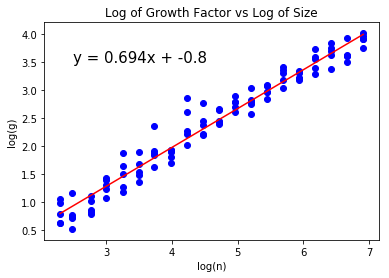

In [6]:
getScatter(data, (2.5,3.5))

Each point on the scatter plot represents a matrix, with the x axis marking the log of the size and the y axis for the log of the growth factor. We are assuming a dependancy of $g \approx cn^{\alpha}$ and look to estimate $\alpha$. By taking the log of both sides we have $log(g) \approx \alpha log(n) + log(c)$ and so we can estimate $\alpha$ by the slope of the line of best fit.

## Question 5.

Below we experiment on matrices of fixed size and try to find an empirical probability of encountering matrices with bad growth factors. We generate 5000 matrices of size 20, 40, and 60 each and then make a histogram of the growth factors to see their distribution.

In [7]:
#finds which index of the count array to increment based on a growth factor g using a binary search
def incCount(g, buckets, bucketWidth, counts):
    #bucketWidth = (buckets[buckets.size-1]-buckets[0])/buckets.size
    low = 0
    high = buckets.size-1
    while (low<=high):
        i = int((low+high)/2)
        if np.abs(g-buckets[i])<bucketWidth/2:
            counts[i] += 1
            return
        elif g<buckets[i]:
            high = i-1
        else:
            low = i+1

#take the data from a reduceMatrices call and create a histogram
def getHistogram(data, numBuckets, barWidth):
    n = data[0,0]
    growths = np.array(data[:,1]).flatten()
    low = math.floor(growths.min())
    high = math.ceil(growths.max())
    buckets = np.linspace(low, high, numBuckets)
    bucketWidth = buckets[1]-buckets[0]
    counts = np.zeros(buckets.size)
    for g in growths:
        incCount(g, buckets, bucketWidth, counts)
    plt.bar(buckets, counts, width=barWidth)
    plt.title("Distribution of Growth Factors for "+str(data.shape[0])+" "+str(int(n))+"x"+str(int(n))+" Matrices")
    plt.xlabel("Growth factor")
    plt.ylabel("Number of matrices")
    plt.show()

In [8]:
unif20 = reduceMatrices(randomMatrix, [20], 2500)
unif40 = reduceMatrices(randomMatrix, [40], 2500)
unif60 = reduceMatrices(randomMatrix, [60], 2500)

Reducing matrices of size 20............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

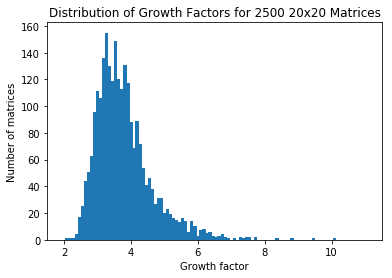

In [9]:
getHistogram(unif20, 100, 0.1)

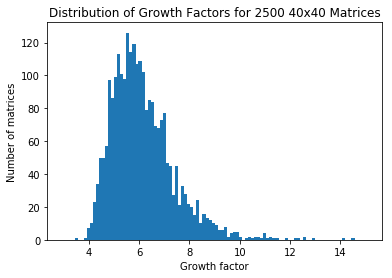

In [10]:
getHistogram(unif40, 100, 0.125)

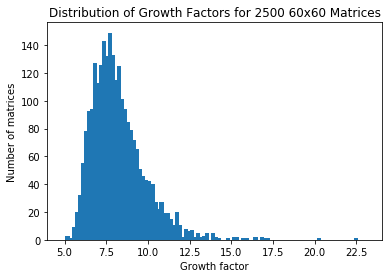

In [11]:
getHistogram(unif60, 100, 0.25)

From the histograms above we see that the probability of encountering a poorly behaved matrix is quite low. An overwhelming majoirty of matrices have very low growth factors.

## Question 6.

We repeat the above analysis but taking random values from a Normal distribution with $\mu = 0$ and $\sigma^2 = 1$

In [12]:
#Create random matrix using the Normal distribution
def randomNormalMatrix(n):
    M = []
    for i in range(0, n):
        r = []
        for j in range(0, n):
            r.append(np.random.normal(0,1))
        M.append(r)
    return np.matrix(M)

In [13]:
data2 = reduceMatrices(randomNormalMatrix, ns, 5)

Reducing matrices of size 10..... Done.
Reducing matrices of size 12..... Done.
Reducing matrices of size 16..... Done.
Reducing matrices of size 20..... Done.
Reducing matrices of size 26..... Done.
Reducing matrices of size 33..... Done.
Reducing matrices of size 42..... Done.
Reducing matrices of size 54..... Done.
Reducing matrices of size 69..... Done.
Reducing matrices of size 88..... Done.
Reducing matrices of size 112..... Done.
Reducing matrices of size 143..... Done.
Reducing matrices of size 183..... Done.
Reducing matrices of size 233..... Done.
Reducing matrices of size 297..... Done.
Reducing matrices of size 379..... Done.
Reducing matrices of size 483..... Done.
Reducing matrices of size 615..... Done.
Reducing matrices of size 784..... Done.
Reducing matrices of size 1000..... Done.
Fully completed. Execution took 200 seconds


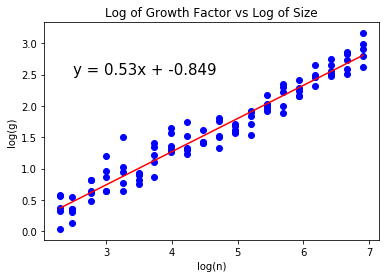

In [14]:
getScatter(data2, (2.5,2.5))

When sampling values from a Normal distribution we get a similar scatter plot with slightly better slope as with the uniform distribution.

In [15]:
normal20 = reduceMatrices(randomNormalMatrix, [20], 2500)
normal40 = reduceMatrices(randomNormalMatrix, [40], 2500)
normal60 = reduceMatrices(randomNormalMatrix, [60], 2500)

Reducing matrices of size 20............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

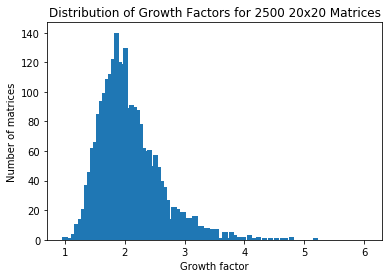

In [19]:
getHistogram(normal20, 100, 0.09)

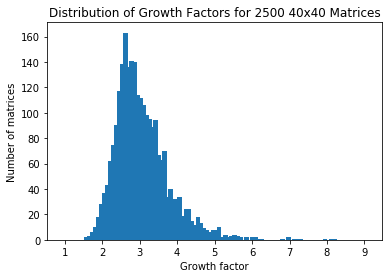

In [17]:
getHistogram(normal40, 100, 0.125)

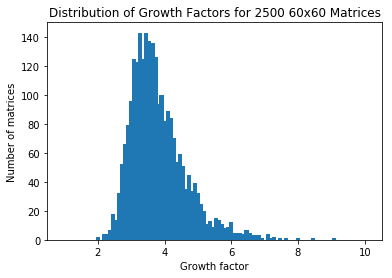

In [18]:
getHistogram(normal60, 100, 0.125)

For normally distributed values the probability of getting bad matrices seems to be even worse as we increase n. This is likely due to the fact that we had a better slope in the scatter plot.